In [23]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
path2train_images = Path("/scratch/scratch6/akansh12/ravir_data/RAVIR Dataset/train/training_images/")
path2train_mask = Path("/scratch/scratch6/akansh12/ravir_data/RAVIR Dataset/train/training_masks/")
path2test_images = Path("/scratch/scratch6/akansh12/ravir_data/RAVIR Dataset/test/")

In [12]:
print("Number of train Images:", len(os.listdir(path2train_images)))
print("Number of test Images:", len(os.listdir(path2test_images)))
assert len(os.listdir(path2train_images)) == len(os.listdir(path2train_mask))

Number of train Images: 23
Number of test Images: 19


In [15]:
train_images = sorted(os.listdir(path2train_images))
train_mask = sorted(os.listdir(path2train_mask))

In [19]:
img_1 = path2train_images/train_images[0]
mask_1 = path2train_mask/train_mask[0]

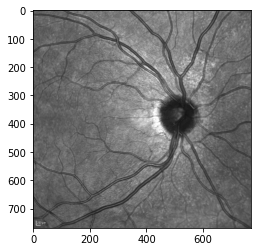

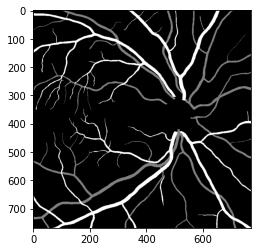

In [22]:
plt.imshow(plt.imread(img_1), cmap = "gray")
plt.show()
plt.imshow(plt.imread(mask_1), cmap = "gray")

In [28]:
#img_1
print("MAX pixel values: ", np.max(np.array(Image.open(img_1))))
print("MIN pixel values: ", np.min(np.array(Image.open(img_1))))

MAX pixel values:  255
MIN pixel values:  0


In [33]:
#mask_1
print("MAX pixel values: ", np.max(np.array(Image.open(mask_1))))
print("MIN pixel values: ", np.min(np.array(Image.open(mask_1))))
print("unique values in the masks:", np.unique(np.array(Image.open(mask_1))))

MAX pixel values:  255
MIN pixel values:  0
unique values in the masks: [  0 128 255]


#### Artery and vein classes have labels of 128 and 256 respectively. Background have a label of 0.